<a href="https://colab.research.google.com/github/Darshan2104/CE_135_Darshan_Tank_ML/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



data = pd.read_csv('/content/drive/MyDrive/L6/BuyComputer.csv')
data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dlabels = data["Purchased"]
data.drop(columns=["Purchased"],axis=1,inplace=True)

xtrain_data,xtest_data,train_label,test_label = train_test_split(data.values,dlabels.values,test_size=0.2,random_state=63)

In [5]:
sc = StandardScaler()
train_data = sc.fit_transform(xtrain_data)
test_data = sc.transform(xtest_data)

In [6]:
class MyLogisticRegressionModel():
  def fit(self, x, y, alpha=1e-5, epochs=10):
    x = torch.tensor(x,dtype=torch.float64)
    y = torch.tensor(y,dtype=torch.float64)
    self._shape = x.shape
    self._inputs = x
    self._bias = torch.zeros(1,dtype=torch.double, requires_grad=True)
    self._weights = torch.zeros(x[0].shape,dtype=torch.double,requires_grad=True)
    print("Bias And Weights:",self._bias.item(),",",torch.detach(self._weights).numpy())
    self._targets = y
    self.alpha = alpha
    self.epochs = epochs
    self.trainModel()
    return 

  def trainModel(self):
    for _ in range(self.epochs):
      # getting predictions
      tpred = self.__predict(self._inputs)
      err = self.loss_func(tpred, self._targets)
      err.backward()
      with torch.no_grad():
        self._weights -= self._weights.grad * self.alpha
        self._bias -= self._bias.grad * self.alpha
        #resetting to zero
        self._bias.grad.zero_()
        self._weights.grad.zero_()
    print("Error:",err.item())
    return
  def sigmoid(self,z):
    return (1/(1+torch.exp(-z)))
  def getWeightsAndBias(self):
    return self._weights,self._bias
  def __predict(self, indata):
    z = torch.matmul(indata,self._weights) + self._bias
    #print(z,torch.nn.Softmax(z).dim)
    return self.sigmoid(z)
  def predict(self,indata):
    z = torch.matmul(torch.as_tensor(indata),self._weights) + self._bias
    return torch.detach(self.sigmoid(z)).numpy()
  def loss_func(self,mpred,ctrue):
    return torch.sum(-(ctrue@torch.log(mpred)+(1-ctrue)@torch.log(1-mpred)))


In [7]:
model = MyLogisticRegressionModel()
model.fit(x=train_data,y=train_label,alpha=1e-3,epochs=500)

Bias And Weights: 0.0 , [0. 0.]
Error: 107.39257290788197


In [8]:
preds = model.predict(test_data)

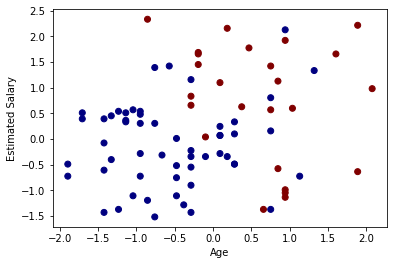

In [9]:
x_zero,x_one = [],[]
for i,buy_com in enumerate(test_label):
  if int(buy_com)==1:
    x_one.append(test_data[i])
  else:
    x_zero.append(test_data[i])
area = (20 * np.random.rand(len(x_zero)))**2 # 0 to 10 point radii
c = np.sqrt(area)
plt.scatter(test_data[:,0],test_data[:,1],c=test_label,cmap='jet')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
#sns.regplot([row[0] for row in test_data],[row[1] for row in test_data])
plt.show()


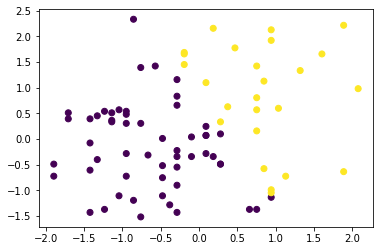

In [10]:
preds = [1 if pr>0.5 else 0 for pr in preds]
plt.scatter(test_data[:,0],test_data[:,1],c=preds)

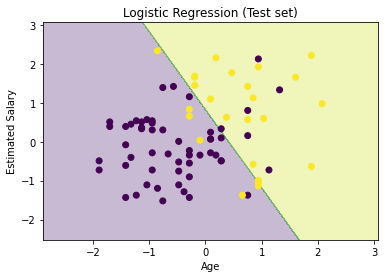

Accuracy: 0.85


In [11]:
def filterPreds(pred,thres):
  return np.array([1 if pr>thres else 0 for pr in pred])
X_set,Y_set = test_data,test_label
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
np.arange(start=X_set[:,1].min()-1,stop=X_set[:,0].max()+1,step=0.01))
plt.contourf(X1, X2,filterPreds(model.predict(np.array([X1.ravel(), X2.ravel()]).T),0.5).reshape(X1.shape),
alpha = 0.3)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(test_data[:,0],test_data[:,1],c=test_label)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

print("Accuracy:",metrics.accuracy_score(test_label,preds))